# Restaurant Revenue Prediction

### Problem Statement

* Create a machine learning model to predict revenue of the restaurant based on the features present in the dataset.

### Import important Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

import pickle

In [3]:
print("nnumpy", np.__version__)
print("pandas", pd.__version__)
print("matplotlib", matplotlib.__version__)
print("seaborn", sns.__version__)
print("sklearn", sklearn.__version__)

nnumpy 1.26.4
pandas 2.2.2
matplotlib 3.9.2
seaborn 0.13.2
sklearn 1.5.2


### Create Model and Predict Model

In [4]:
df = pd.read_csv("Datasets/revenue_prediction.csv")
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [6]:
df.isna().sum().sum()

0

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=["Id", "Name"], inplace=True)

In [9]:
df["City"].value_counts()

City
Bengaluru    43
Mumbai       19
Noida        18
Pune         13
Gurugram      7
Name: count, dtype: int64

In [10]:
df["Franchise"].value_counts()

Franchise
Yes    55
No     45
Name: count, dtype: int64

In [11]:
df.shape

(100, 6)

In [12]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtypes == "object" and col != "Revenue":
        df[col] = le.fit_transform(df[col])

In [13]:
x = df.iloc[:,[-2]]
y = df.iloc[:,-1]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print(f"R2-Score: {r2_score(y_test, y_pred)*100:0.2f}%")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):0.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):0.4f}")

R2-Score: 87.24%
RMSE: 432167.2974
MAE: 318430.6327


### **Visualising the Training & Testing set results**

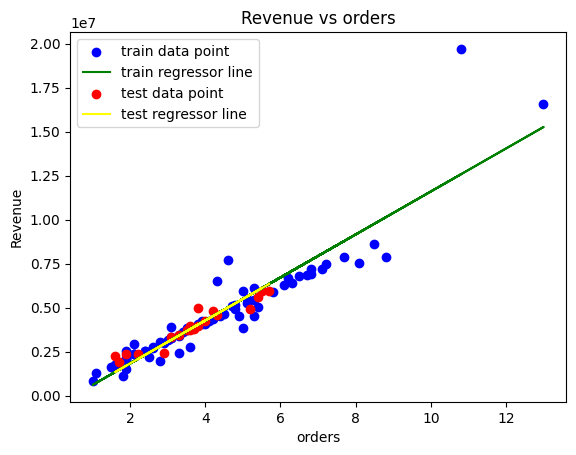

In [19]:
plt.scatter(x_train, y_train, color="blue", label="train data point")
plt.plot(x_train, lr_model.predict(x_train), color="green", label="train regressor line")

plt.scatter(x_test, y_test, color="red", label="test data point")
plt.plot(x_test, lr_model.predict(x_test), color="yellow", label="test regressor line")

plt.title("Revenue vs orders")
plt.xlabel("orders")
plt.ylabel("Revenue")
plt.legend()
plt.savefig("revenue_train_test_result.png")
plt.show()

### **Predict For custom Data**

In [17]:
# Order_Placed ==> 5
input_data = np.array([[float(input("Enter a value for prediction (e.g., Order_Placed): "))]])
Prediction_result = lr_model.predict(input_data)
print(f"Order Placed: {input_data[0][0]} \nRevenue: {Prediction_result[0]:0.2f}")

ValueError: could not convert string to float: ''

### Create .pkl file

In [49]:
with open('Revenue_Prediction.pkl', 'wb') as file:
	pickle.dump(lr_model, file)